## Imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.io import read_image
import torch.nn.functional as F

from matplotlib import pyplot as plt

In [ ]:
from helpers import load_dataset

# Model architecture

In [4]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Encoder part (downsampling)
        self.encoder = nn.Sequential(
            nn.Conv2d(
                12, 64, kernel_size=3, stride=2, padding=1
            ),  # Input: 12 channels (4 images, 3 channels each)
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        # Decoder part (upsampling)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(
                512, 256, kernel_size=3, stride=2, padding=1, output_padding=1
            ),
            nn.ReLU(),
            nn.ConvTranspose2d(
                256, 128, kernel_size=3, stride=2, padding=1, output_padding=1
            ),
            nn.ReLU(),
            nn.ConvTranspose2d(
                128, 64, kernel_size=3, stride=2, padding=1, output_padding=1
            ),
            nn.ReLU(),
            nn.ConvTranspose2d(
                64, 3, kernel_size=3, stride=2, padding=1, output_padding=1
            ),
            nn.Sigmoid(),  # To output values between 0 and 1 (image normalization)
        )

    def forward(self, img1, img2, img3, img4):
        # Concatenate the 4 input images along the channel dimension
        x = torch.cat(
            (img1, img2, img3, img4), dim=1
        )  # Shape: (batch_size, 12, 256, 256)

        # Pass through the encoder (downsampling)
        x = self.encoder(x)

        # Pass through the decoder (upsampling)
        output = self.decoder(x)

        return output  # Shape: (batch_size, 3, 256, 256)


# Instantiate the model
# autoencoder = Autoencoder()
model = UNet()

# Loss and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for image prediction
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Train

In [ ]:
train_loader = load_dataset("wildfire")

In [ ]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    for x,y in train_loader:
        model.train()

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output_img = model(x)

        # Compute loss
        loss = criterion(output_img, y)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/1000], Loss: 0.0509
Epoch [2/1000], Loss: 0.0508
Epoch [3/1000], Loss: 0.0508
Epoch [4/1000], Loss: 0.0507
Epoch [5/1000], Loss: 0.0507
Epoch [6/1000], Loss: 0.0506
Epoch [7/1000], Loss: 0.0505
Epoch [8/1000], Loss: 0.0505
Epoch [9/1000], Loss: 0.0504
Epoch [10/1000], Loss: 0.0503
Epoch [11/1000], Loss: 0.0502
Epoch [12/1000], Loss: 0.0501
Epoch [13/1000], Loss: 0.0499
Epoch [14/1000], Loss: 0.0498
Epoch [15/1000], Loss: 0.0496
Epoch [16/1000], Loss: 0.0494
Epoch [17/1000], Loss: 0.0491
Epoch [18/1000], Loss: 0.0487
Epoch [19/1000], Loss: 0.0482
Epoch [20/1000], Loss: 0.0477
Epoch [21/1000], Loss: 0.0470
Epoch [22/1000], Loss: 0.0463
Epoch [23/1000], Loss: 0.0456
Epoch [24/1000], Loss: 0.0450
Epoch [25/1000], Loss: 0.0446
Epoch [26/1000], Loss: 0.0441
Epoch [27/1000], Loss: 0.0435
Epoch [28/1000], Loss: 0.0427
Epoch [29/1000], Loss: 0.0420
Epoch [30/1000], Loss: 0.0413
Epoch [31/1000], Loss: 0.0408
Epoch [32/1000], Loss: 0.0403
Epoch [33/1000], Loss: 0.0398
Epoch [34/1000], Lo

# Test and visualize

In [6]:
resize = transforms.Resize((256,256))

img_a1 = resize(read_image("data/alexandro/2023-08-20-00_00_2023-08-20-23_59_Sentinel-2_L2A_SWIR.jpg")) / 256
img_a2 = resize(read_image("data/alexandro/2023-08-18-00_00_2023-08-18-23_59_Vegetation_Indices_NDVI_.jpg")) / 256
img_a3 = resize(read_image("data/alexandro/2024-11-23-00_00_2024-11-23-23_59_DEM_COPERNICUS_30_Grayscale.jpg")) / 256
img_a4 = resize(read_image("data/alexandro/2023-08-20-00_00_2023-08-20-23_59_Sentinel-3_SLSTR_Thermal_IR_emission_F2.jpg")) / 256
img_a5 = resize(read_image("data/alexandro/2023-08-23-00_00_2023-08-23-23_59_Sentinel-2_L2A_SWIR.jpg")) / 256

img_r1 = resize(read_image("data/rhodes/2023-07-23-00_00_2023-07-23-23_59_Sentinel-2_L2A_SWIR.jpg")) / 256
img_r2 = resize(read_image("data/rhodes/2023-07-08-00_00_2023-07-08-23_59_Vegetation_Indices_NDVI_.jpg")) / 256
img_r3 = resize(read_image("data/rhodes/2024-11-23-00_00_2024-11-23-23_59_DEM_COPERNICUS_30_Grayscale.jpg")) / 256
img_r4 = resize(read_image("data/rhodes/2023-07-23-00_00_2023-07-23-23_59_Sentinel-3_SLSTR_Thermal_IR_emission_F2.jpg")) / 256
img_r5 = resize(read_image("data/rhodes/2023-07-28-00_00_2023-07-28-23_59_Sentinel-2_L2A_SWIR.jpg")) / 256

In [8]:
output_img = model(
    torch.stack((img_a1, img_r1)),
    torch.stack((img_a2, img_r2)),
    torch.stack((img_a3, img_r3)),
    torch.stack((img_a4, img_r4)),
)

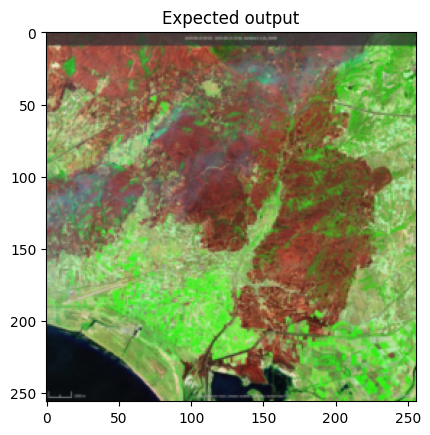

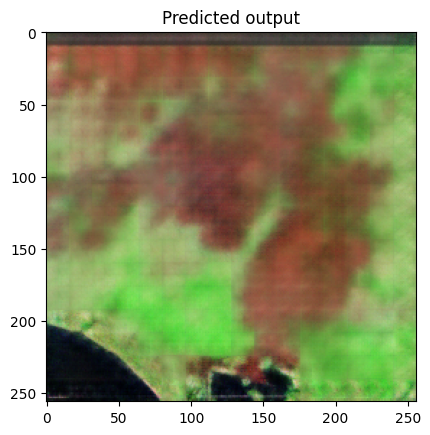

In [10]:
plt.imshow(img_a5.permute(1, 2, 0).detach())
plt.title("Expected output")
plt.show()

plt.imshow(output_img[0].permute(1, 2, 0).detach())
plt.title("Predicted output")
plt.show()

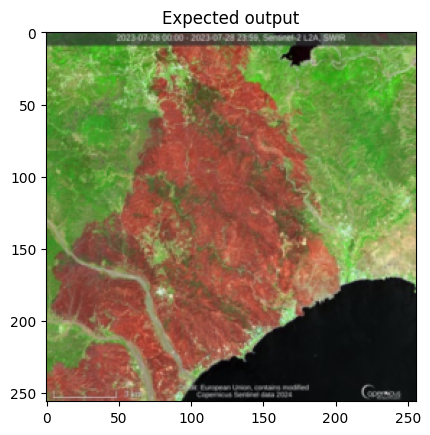

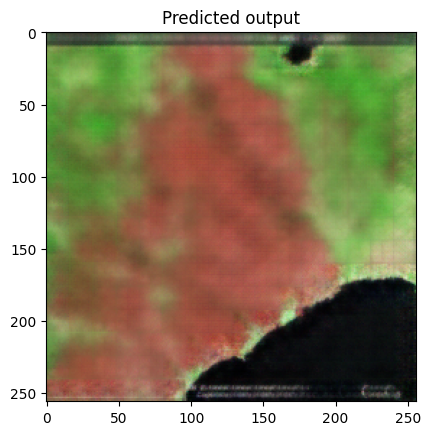

In [11]:
plt.imshow(img_r5.permute(1, 2, 0).detach())
plt.title("Expected output")
plt.show()

plt.imshow(output_img[1].permute(1, 2, 0).detach())
plt.title("Predicted output")
plt.show()